In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-colorblind')

In [2]:
df = pd.read_csv('/Users/fanyang/Documents/musicbox/data/churn_model_0116.csv')

In [3]:
df.head()

,Unnamed: 0,uid,total_play,play_percentage,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_21,freq_P_last_30,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_21,freq_S_last_30,recn_P,recn_D,recn_S,Ischurn,device
0,0,126941437,42975.0,0.620166,0,0,19,28,29,364,...,0,0,3,4,24,3,0,13,0,1
1,1,132952490,42539.0,0.783768,0,0,0,121,188,263,...,0,0,2,9,10,8,15,8,0,1
2,2,151294213,600.0,0.259291,0,0,0,5,5,16,...,0,0,0,0,0,11,0,0,1,1
3,3,163538558,893.0,0.654692,1,1,1,2,4,5,...,0,0,0,0,1,0,0,29,0,1
4,4,167328646,3231.0,0.936793,0,0,0,0,0,11,...,0,0,0,0,1,27,0,27,1,1


In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.describe()

,uid,total_play,play_percentage,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_21,freq_P_last_30,freq_D_last_1,...,freq_S_last_3,freq_S_last_7,freq_S_last_14,freq_S_last_21,freq_S_last_30,recn_P,recn_D,recn_S,Ischurn,device
count,5.463800e+04,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,...,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.000000,54638.00000
mean,1.673748e+08,20988.457631,3.358492,3.530162,11.057542,24.864124,54.263461,84.967330,148.323145,0.146052,...,0.374154,1.214301,2.976701,4.978001,11.078297,14.913137,7.003752,9.474450,0.611589,0.87441
std,1.072960e+07,57042.250407,46.002875,16.415221,40.176328,77.385862,147.537213,208.621542,299.557254,5.566554,...,2.416769,5.276240,10.619709,15.904079,27.565552,11.466747,10.743581,11.363322,0.487393,0.33139
min,3.421860e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.680337e+08,568.000000,0.440933,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.00000
50%,1.684885e+08,3445.000000,0.678112,0.000000,0.000000,0.000000,0.000000,5.000000,38.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,0.000000,3.000000,1.000000,1.00000
75%,1.687745e+08,16590.750000,0.845773,0.000000,0.000000,10.000000,37.000000,72.000000,149.000000,0.000000,...,0.000000,0.000000,1.000000,3.000000,11.000000,27.000000,14.000000,20.000000,1.000000,1.00000
max,1.692558e+08,975716.000000,999.811189,994.000000,1281.000000,2128.000000,3764.000000,4375.000000,4375.000000,950.000000,...,164.000000,339.000000,506.000000,587.000000,1221.000000,29.000000,29.000000,29.000000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54638 entries, 0 to 54637
Data columns (total 26 columns):
uid                54638 non-null int64
total_play         54638 non-null float64
play_percentage    54638 non-null float64
freq_P_last_1      54638 non-null int64
freq_P_last_3      54638 non-null int64
freq_P_last_7      54638 non-null int64
freq_P_last_14     54638 non-null int64
freq_P_last_21     54638 non-null int64
freq_P_last_30     54638 non-null int64
freq_D_last_1      54638 non-null int64
freq_D_last_3      54638 non-null int64
freq_D_last_7      54638 non-null int64
freq_D_last_14     54638 non-null int64
freq_D_last_21     54638 non-null int64
freq_D_last_30     54638 non-null int64
freq_S_last_1      54638 non-null int64
freq_S_last_3      54638 non-null int64
freq_S_last_7      54638 non-null int64
freq_S_last_14     54638 non-null int64
freq_S_last_21     54638 non-null int64
freq_S_last_30     54638 non-null int64
recn_P             54638 non-null int64
recn_D 

In [7]:
df['device_mac_ip'] = (df['device']==0).astype(int)
df['device_ar'] = (df['device']==1).astype(int)

In [8]:
data_columns = list(df.columns.values)

In [9]:
data_columns.remove('uid')
data_columns.remove('Ischurn')
data_columns.remove('device')

In [10]:
X = df[data_columns]
y = df['Ischurn']

In [11]:
X.shape

(54638, 25)

In [12]:
y.shape

(54638,)

In [13]:
X.columns

Index(['total_play', 'play_percentage', 'freq_P_last_1', 'freq_P_last_3',
       'freq_P_last_7', 'freq_P_last_14', 'freq_P_last_21', 'freq_P_last_30',
       'freq_D_last_1', 'freq_D_last_3', 'freq_D_last_7', 'freq_D_last_14',
       'freq_D_last_21', 'freq_D_last_30', 'freq_S_last_1', 'freq_S_last_3',
       'freq_S_last_7', 'freq_S_last_14', 'freq_S_last_21', 'freq_S_last_30',
       'recn_P', 'recn_D', 'recn_S', 'device_mac_ip', 'device_ar'],
      dtype='object')

In [14]:
y[:10]

0    0
1    0
2    1
3    0
4    1
5    0
6    1
7    1
8    1
9    1
Name: Ischurn, dtype: int64

In [15]:
# split train and test data
# standardizing data
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [16]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [18]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [19]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

#### Logistic regression

              train      test
metrics                      
AUC        0.892886  0.889999
Accuracy   0.823354  0.821864
Precision  0.856496  0.852089
Recall     0.855181  0.855509
f1-score   0.855838  0.853795


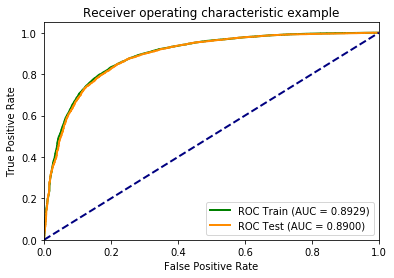

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.5, penalty='l2')
clf.fit(X_train, y_train)
train_test_model(clf, X_train, y_train, X_test, y_test)

In [21]:
selected_features = X.columns

In [22]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
20,recn_P,1.620527
14,freq_S_last_1,0.090385
12,freq_D_last_21,0.082938
1,play_percentage,0.064647
7,freq_P_last_30,0.062173
24,device_ar,0.060530
10,freq_D_last_7,0.021758
9,freq_D_last_3,0.020032
6,freq_P_last_21,0.011645
17,freq_S_last_14,-0.026381


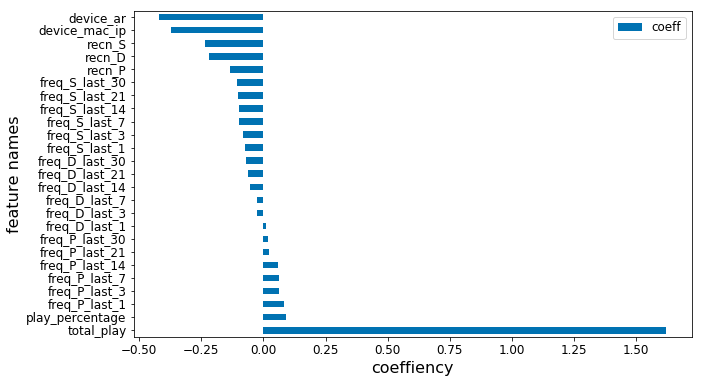

<Figure size 1440x2160 with 0 Axes>

In [29]:
plt.rcParams["figure.figsize"] = [10,6]

axis = df_coeffs.plot.barh()
df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = data_columns
t = np.arange(len(df_feature_importance['features']))
axis.set_yticks(t)
axis.set_yticklabels(df_feature_importance['features'])
plt.ylabel('feature names', fontsize=16)
plt.xlabel('coeffiency', fontsize=16)
plt.rcParams.update({'font.size':12})

              train      test
metrics                      
AUC        0.892870  0.889999
Accuracy   0.823354  0.821864
Precision  0.856679  0.852230
Recall     0.854925  0.855308
f1-score   0.855801  0.853766


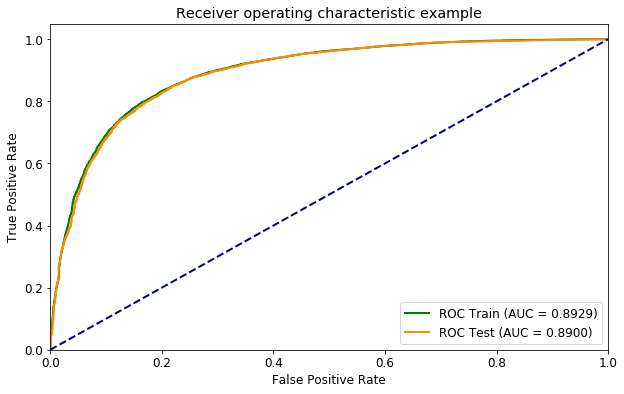

In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.2, penalty='l1')
clf.fit(X_train, y_train)
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Random Forest

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


              train      test
metrics                      
AUC        0.920421  0.897885
Accuracy   0.846023  0.829734
Precision  0.854725  0.839308
Recall     0.902217  0.890427
f1-score   0.877829  0.864112


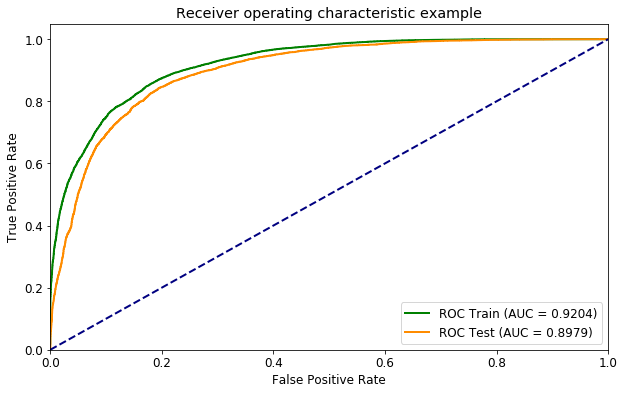

In [32]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators': 200,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 5,
              'min_samples_leaf': 30,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

clf.fit(X_train, y_train)

train_test_model(clf, X_train, y_train, X_test, y_test)

Text(0.5,0,'imporatnce')

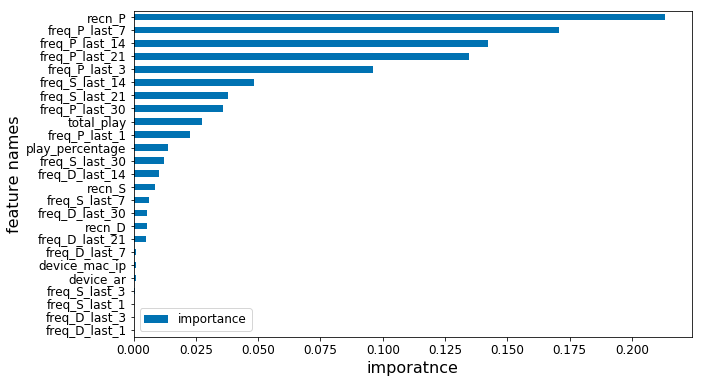

In [33]:
df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = data_columns
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance', inplace=True)
axis = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['features']))
axis.set_yticks(t)
axis.set_yticklabels(df_feature_importance['features'])
plt.ylabel('feature names', fontsize=16)
plt.xlabel('imporatnce', fontsize=16)



#### Xgboost

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


              train      test
metrics                      
AUC        0.903539  0.888910
Accuracy   0.835172  0.825220
Precision  0.843057  0.837019
Recall     0.898422  0.884808
f1-score   0.869860  0.860251


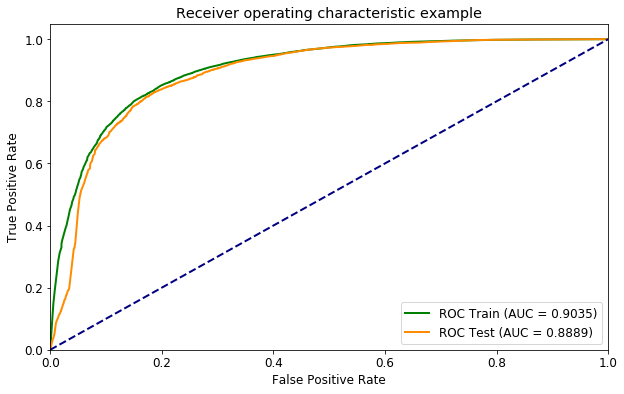

In [34]:
import xgboost as xgb
from xgboost import XGBClassifier
parameters = {'objective':'binary:logistic',
              'learning_rate': 0.05,
              'max_depth': 6,
              'min_child_weight': 11,
              'silent': 1,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'n_estimators': 5,
              'missing':-999,
              'seed': 1337}

clf = xgb.XGBClassifier(**parameters)
clf.fit(X_train, y_train)
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Gradient boosting

              train      test
metrics                      
AUC        0.938761  0.890139
Accuracy   0.874444  0.821803
Precision  0.877949  0.831093
Recall     0.923625  0.887217
f1-score   0.900208  0.858238


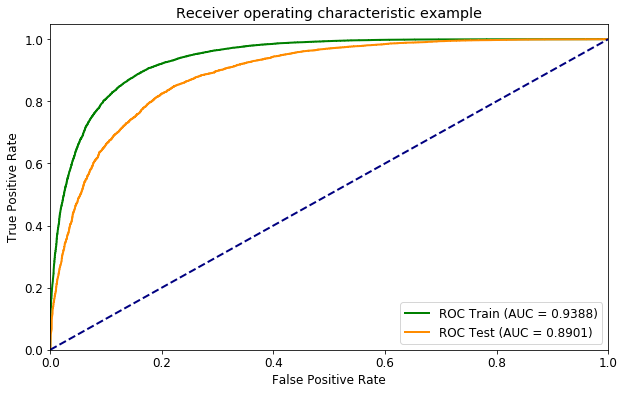

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'n_estimators': 300,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

clf = GradientBoostingClassifier(**parameters)

train_test_model(clf, X_train, y_train, X_test, y_test)

#### Xgboost

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


              train      test
metrics                      
AUC        0.904195  0.896863
Accuracy   0.834362  0.828697
Precision  0.846219  0.839757
Recall     0.891940  0.887618
f1-score   0.868478  0.863024


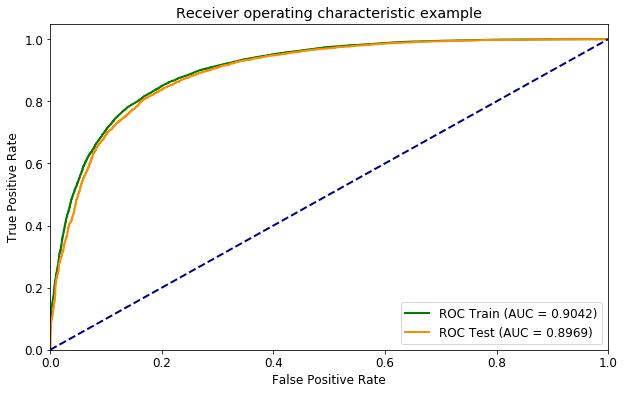

In [36]:
import xgboost as xgb
parameters = {'silent':'False', 
                      'scale_pos_weight':1,
                      'learning_rate':0.01,  
                      'colsample_bytree' : 0.4,
                      'subsample' : 0.8,
                      'objective':'binary:logistic', 
                      'n_estimators':1000, 
                      'reg_alpha' : 0.3,
                      'max_depth':4, 
                      'gamma':10}

clf = xgb.XGBClassifier(**parameters)
clf.fit(X_train, y_train)
train_test_model(clf, X_train, y_train, X_test, y_test)

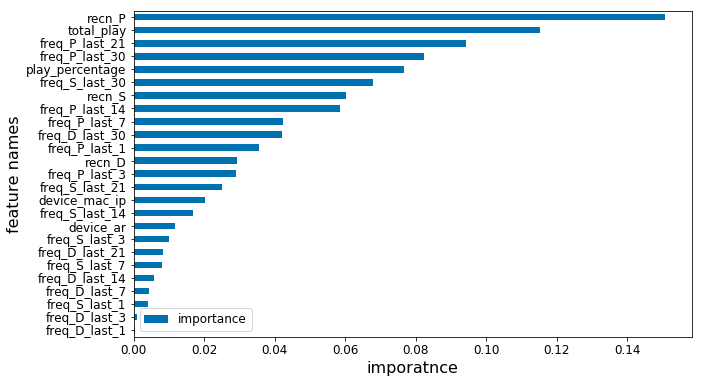

In [37]:
df_feature_importance = pd.DataFrame()
df_feature_importance['features'] = data_columns
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance', inplace=True)
axis = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['features']))
axis.set_yticks(t)
axis.set_yticklabels(df_feature_importance['features'])
plt.ylabel('feature names', fontsize=16)
plt.xlabel('imporatnce', fontsize=16)
plt.show()

#### Nerual network

In [ ]:
from sklearn.neural_network import MLPClassifier
parameters = {
    'solver': 'adam',
    'activation':'relu',
    'alpha': 0.3,
    'hidden_layer_sizes':(10,5),
    'learning_rate':'adaptive',
    'random_state':1
}
clf = MLPClassifier(**parameters)
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Grid search for Random forest

In [ ]:
import xgboost as xgb
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV



clf = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [100, 500, 1000, 1500],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.2, 0.5, 0.8],
    'n_jobs': [-1],
}

acc_scorer = make_scorer(roc_auc_score)


grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)


clf = grid_obj.best_estimator_


clf.fit(X_train, y_train)


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [ ]:
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

# parameter combination to try
param_grid = {'n_estimators': [50,100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2, 5],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

acc_scorer = make_scorer(roc_auc_score)


grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)


clf = grid_obj.best_estimator_


clf.fit(X_train, y_train)

In [ ]:
train_test_model(clf, X_train, y_train, X_test, y_test)